# AIM

## to generate MNIST digits using gans

#### import libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("/data")

Extracting /data\train-images-idx3-ubyte.gz
Extracting /data\train-labels-idx1-ubyte.gz
Extracting /data\t10k-images-idx3-ubyte.gz
Extracting /data\t10k-labels-idx1-ubyte.gz


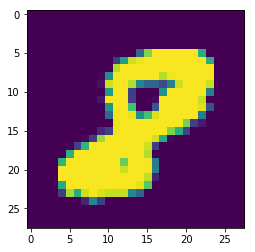

In [7]:
plt.imshow(mnist.train.images[34].reshape(28,28))

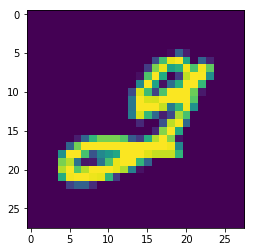

In [8]:
plt.imshow(mnist.train.images[65].reshape(28,28))

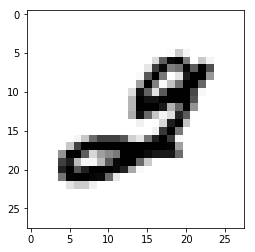

In [9]:
plt.imshow(mnist.train.images[65].reshape(28,28),cmap='Greys')

In [10]:
def generator(z, reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z,units = 128)
        alpha = 0.01
        hidden1=tf.mximum(alpha*hidden1,hidden1)
        hidden2 = tf.layers.dense(inputs=z,units = 128)
        hidden2=tf.mximum(alpha*hidden2,hidden2)
        
        output = tf.layers.dense(hidden2,units=784,activation=tf.nn.tanh)
        
        return output
        

In [ ]:
def discriminator(z, reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z,units = 128)
        alpha = 0.01
        hidden1=tf.mximum(alpha*hidden1,hidden1)
        hidden2 = tf.layers.dense(inputs=z,units = 128)
        hidden2=tf.mximum(alpha*hidden2,hidden2)
        
        logits = tf.layer.dense()
        
        return output